For this assessment, we’d like to see how you approach discovery, problem solving, and communication for a data science project.

Attempt to solve the following problem on the provided dataset using Python (no restrictions on
package usage):
* You’re given a dataset of Starcraft player performance data in ranked games. We want
to develop a model to predict a player’s rank using the information provided in the
dataset.

* Document your decision making throughout the model building process (EDA, ETL,
modeling, evaluation, etc).
* Try to functionize any repetitive tasks so that the workflow is simplified.
* Once you’ve settled on your model, communicate your findings to non-technical stakeholders

Hypothetical: after seeing your work, your stakeholders come to you and say that they
can collect more data, but want your guidance before starting. How would you advise
them based on your EDA and model results?

# Data Imports + Initial Checks

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('starcraft_player_data.csv')

# Preprocessing

In [ ]:
df.replace('?', np.nan, inplace=True)
df = df.astype(float)
df.fillna(df.mean(), inplace=True)

df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3395 entries, 0 to 3394
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   GameID                3395 non-null   float64
 1   LeagueIndex           3395 non-null   float64
 2   Age                   3395 non-null   float64
 3   HoursPerWeek          3395 non-null   float64
 4   TotalHours            3395 non-null   float64
 5   APM                   3395 non-null   float64
 6   SelectByHotkeys       3395 non-null   float64
 7   AssignToHotkeys       3395 non-null   float64
 8   UniqueHotkeys         3395 non-null   float64
 9   MinimapAttacks        3395 non-null   float64
 10  MinimapRightClicks    3395 non-null   float64
 11  NumberOfPACs          3395 non-null   float64
 12  GapBetweenPACs        3395 non-null   float64
 13  ActionLatency         3395 non-null   float64
 14  ActionsInPAC          3395 non-null   float64
 15  TotalMapExplored     

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
count,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000
mean,4805.012371,4.184094,21.647904,15.910752,960.421809,117.046947,0.004299,0.000374,4.364654,0.000098,0.000387,0.003463,40.361562,63.739403,5.272988,22.131664,0.001032,6.534021,0.000059,0.000142
std,2719.944851,1.517327,4.172119,11.863809,17172.094828,51.945291,0.005284,0.000225,2.360333,0.000166,0.000377,0.000992,17.153570,19.238869,1.494835,7.431719,0.000519,1.857697,0.000111,0.000265
min,52.000000,1.000000,16.000000,0.000000,3.000000,22.059600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000679,6.666700,24.093600,2.038900,5.000000,0.000077,2.000000,0.000000,0.000000
25%,2464.500000,3.000000,19.000000,8.000000,300.000000,79.900200,0.001258,0.000204,3.000000,0.000000,0.000140,0.002754,28.957750,50.446600,4.272850,17.000000,0.000683,5.000000,0.000000,0.000000
50%,4874.000000,4.000000,21.000000,12.000000,500.000000,108.010200,0.002500,0.000353,4.000000,0.000040,0.000281,0.003395,36.723500,60.931800,5.095500,22.000000,0.000905,6.000000,0.000000,0.000020
75%,7108.500000,5.000000,24.000000,20.000000,800.000000,142.790400,0.005133,0.000499,6.000000,0.000119,0.000514,0.004027,48.290500,73.681300,6.033600,27.000000,0.001259,8.000000,0.000086,0.000181
max,10095.000000,8.000000,44.000000,168.000000,1000000.000000,389.831400,0.043088,0.001752,10.000000,0.003019,0.004041,0.007971,237.142900,176.372100,18.558100,58.000000,0.005149,13.000000,0.000902,0.003084


# Split Data

In [ ]:
# Split the data into features (X) and target variable (y)
X = df.drop('LeagueIndex', axis=1)
y = df['LeagueIndex']

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to evaluate model performance

In [ ]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)  
    precision = precision_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    report = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    return acc, precision, f1, report, cm

# Scale The Features

In [ ]:
# Function to perform feature scaling
def scale_features(X_train, X_test):
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    return X_train, X_test

In [ ]:
X_train, X_test = scale_features(X_train, X_test)

# Model Performance On Training Data 

In [ ]:

# Support Vector Machines (SVM) - Training
svm_pre = SVC()
svm_pre.fit(X_train, y_train)
svm_pre_predictions = svm_pre.predict(X_train)
svm_pre_accuracy = accuracy_score(y_train, svm_pre_predictions)
svm_pre_f1 = f1_score(y_train, svm_pre_predictions, average='weighted')
svm_pre_precision = precision_score(y_train, svm_pre_predictions, average='weighted')


#--------------------------------------------------------------------------------------------------------

# K-Nearest Neighbors (KNN) - Training
knn_pre = KNeighborsClassifier()
knn_pre.fit(X_train, y_train)
knn_pre_predictions = knn_pre.predict(X_train)
knn_pre_accuracy = accuracy_score(y_train, knn_pre_predictions)
knn_pre_f1 = f1_score(y_train, knn_pre_predictions, average='weighted')
knn_pre_precision = precision_score(y_train, knn_pre_predictions, average='weighted')

#--------------------------------------------------------------------------------------------------------

# AdaBoost Classifier - Training
adaboost_pre = AdaBoostClassifier()
adaboost_pre.fit(X_train, y_train)
adaboost_pre_predictions = adaboost_pre.predict(X_train)
adaboost_pre_accuracy = accuracy_score(y_train, adaboost_pre_predictions)
adaboost_pre_f1 = f1_score(y_train, adaboost_pre_predictions, average='weighted')
adaboost_pre_precision = precision_score(y_train, adaboost_pre_predictions, average='weighted')

#--------------------------------------------------------------------------------------------------------

# Decision Tree Classifier - Training
dt_classifier_pre = DecisionTreeClassifier(random_state=42)
dt_classifier_pre.fit(X_train, y_train)
dt_classifier_pre_predictions = dt_classifier_pre.predict(X_train)
dt_classifier_pre_accuracy = accuracy_score(y_train, dt_classifier_pre_predictions)
dt_classifier_pre_f1 = f1_score(y_train, dt_classifier_pre_predictions, average='weighted')
dt_classifier_pre_precision = precision_score(y_train, dt_classifier_pre_predictions, average='weighted')

#--------------------------------------------------------------------------------------------------------

# Random Forest Classifier - Training
rf_pre = RandomForestClassifier(random_state=42)
rf_pre.fit(X_train, y_train)
rf_pre_predictions = rf_pre.predict(X_train)
rf_pre_accuracy = accuracy_score(y_train, rf_pre_predictions)
rf_pre_f1 = f1_score(y_train, rf_pre_predictions, average='weighted')
rf_pre_precision = precision_score(y_train, rf_pre_predictions, average='weighted')

#--------------------------------------------------------------------------------------------------------

# Gradient Boosting Classifier - Training
gb_pre = GradientBoostingClassifier(random_state=42)
gb_pre.fit(X_train, y_train)
gb_pre_predictions = gb_pre.predict(X_train)
gb_pre_accuracy = accuracy_score(y_train, gb_pre_predictions)
gb_pre_f1 = f1_score(y_train, gb_pre_predictions, average='weighted')
gb_pre_precision = precision_score(y_train, gb_pre_predictions, average='weighted')

#--------------------------------------------------------------------------------------------------------

# Neural Network Classifier - Training
nn_pre = MLPClassifier(random_state=42)
nn_pre.fit(X_train, y_train)
nn_pre_predictions = nn_pre.predict(X_train)
nn_pre_accuracy = accuracy_score(y_train, nn_pre_predictions)
nn_pre_f1 = f1_score(y_train, nn_pre_predictions, average='weighted')
nn_pre_precision = precision_score(y_train, nn_pre_predictions, average='weighted')

#--------------------------------------------------------------------------------------------------------

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# Training Data Performance Results

Training Data Results:
----------------------------------
Accuracy (SVM): 53.27687776141384
Precision (SVM): 54.58904177391239
F1 Score (SVM): 52.58121687558579

Accuracy (KNN): 54.27098674521355
Precision (KNN): 55.617796741187256
F1 Score (KNN): 54.242697935049364

Accuracy (AdaBoost): 29.12371134020619
Precision (AdaBoost): 38.66795313909526
F1 Score (AdaBoost): 24.509871131911545

Accuracy (Decision Tree): 100.0
Precision (Decision Tree): 100.0
F1 Score (Decision Tree): 100.0

Accuracy (Random Forest): 100.0
Precision (Random Forest): 100.0
F1 Score (Random Forest): 100.0

Accuracy (Gradient Boosting): 80.22827687776142
Precision (Gradient Boosting): 80.88352142912053
F1 Score (Gradient Boosting): 80.327382484658

Accuracy (Neural Network): 60.014727540500736
Precision (Neural Network): 60.40611196997159
F1 Score (Neural Network): 59.843921303994755




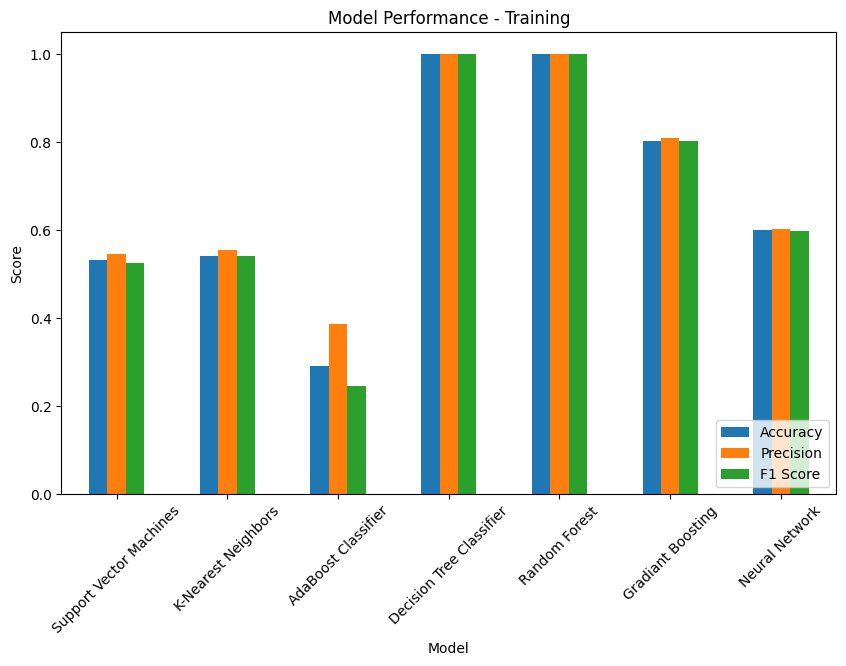

In [ ]:
# Calculate and display scores - Training

models = {
    'SVM': (svm_pre, svm_pre_accuracy, svm_pre_precision, svm_pre_f1),
    'KNN': (knn_pre, knn_pre_accuracy, knn_pre_precision, knn_pre_f1),
    'AdaBoost': (adaboost_pre, adaboost_pre_accuracy, adaboost_pre_precision, adaboost_pre_f1),
    'Decision Tree': (dt_classifier_pre, dt_classifier_pre_accuracy, dt_classifier_pre_precision, dt_classifier_pre_f1),
    'Random Forest': (rf_pre, rf_pre_accuracy, rf_pre_precision, rf_pre_f1),
    'Gradient Boosting': (gb_pre, gb_pre_accuracy, gb_pre_precision, gb_pre_f1),
    'Neural Network': (nn_pre, nn_pre_accuracy, nn_pre_precision, nn_pre_f1)
}

print('Training Data Results:')
print('----------------------------------')

for model_name, (model, accuracy, precision, f1) in models.items():
    print(f'Accuracy ({model_name}):', accuracy * 100)
    print(f'Precision ({model_name}):', precision * 100)
    print(f'F1 Score ({model_name}):', f1 * 100)
    print()


# Create a dataframe to store model performance - Training
model_performance_pre = pd.DataFrame({
    'Model': ['Support Vector Machines', 'K-Nearest Neighbors', 'AdaBoost Classifier', 'Decision Tree Classifier', 'Random Forest', 'Gradiant Boosting', 'Neural Network'],
    'Accuracy': [svm_pre_accuracy, knn_pre_accuracy, adaboost_pre_accuracy, dt_classifier_pre_accuracy, rf_pre_accuracy,gb_pre_accuracy,nn_pre_accuracy],
    'Precision': [svm_pre_precision, knn_pre_precision, adaboost_pre_precision, dt_classifier_pre_precision, rf_pre_precision,gb_pre_precision, nn_pre_precision],
    'F1 Score': [svm_pre_f1, knn_pre_f1, adaboost_pre_f1, dt_classifier_pre_f1, rf_pre_f1,gb_pre_f1, nn_pre_f1]
})

# Display the scores in a bar graph - Training
print()
model_performance_pre.plot(x='Model', y=['Accuracy', 'Precision', 'F1 Score'], kind='bar', figsize=(10, 6))
plt.title('Model Performance - Training')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.show()

# Model Performance On Testing Data - (Pre-Tuning)

Models Used: 'Support Vector Machines', 'K-Nearest Neighbors', 'AdaBoost Classifier', 'Decision Tree Classifier', 'Random Forest', 'Gradiant Boosting', 'Neural Network (Multilayer Perceptron)'

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


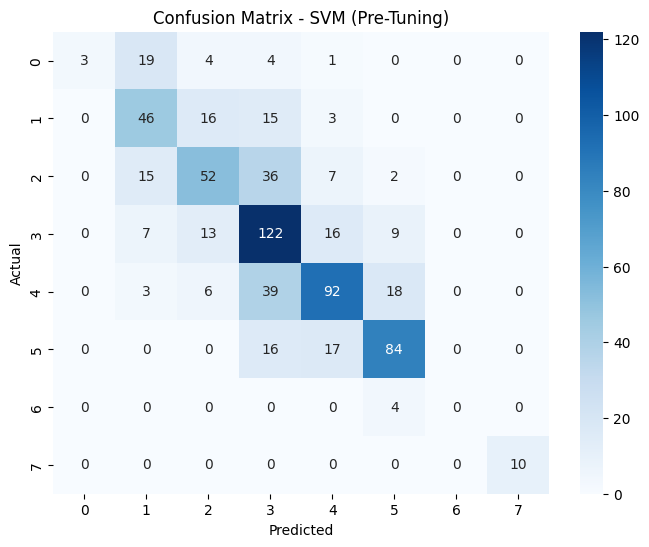

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


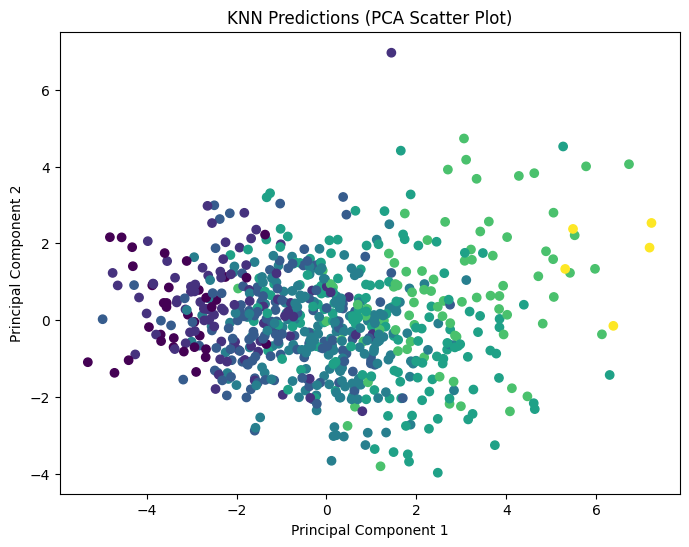

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


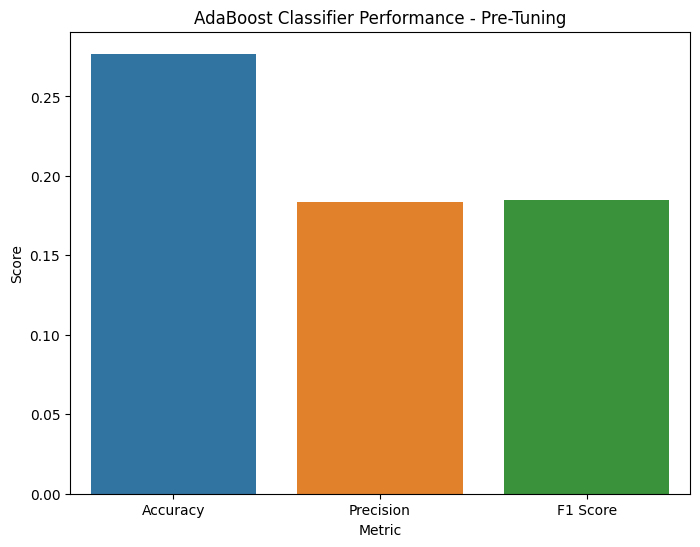

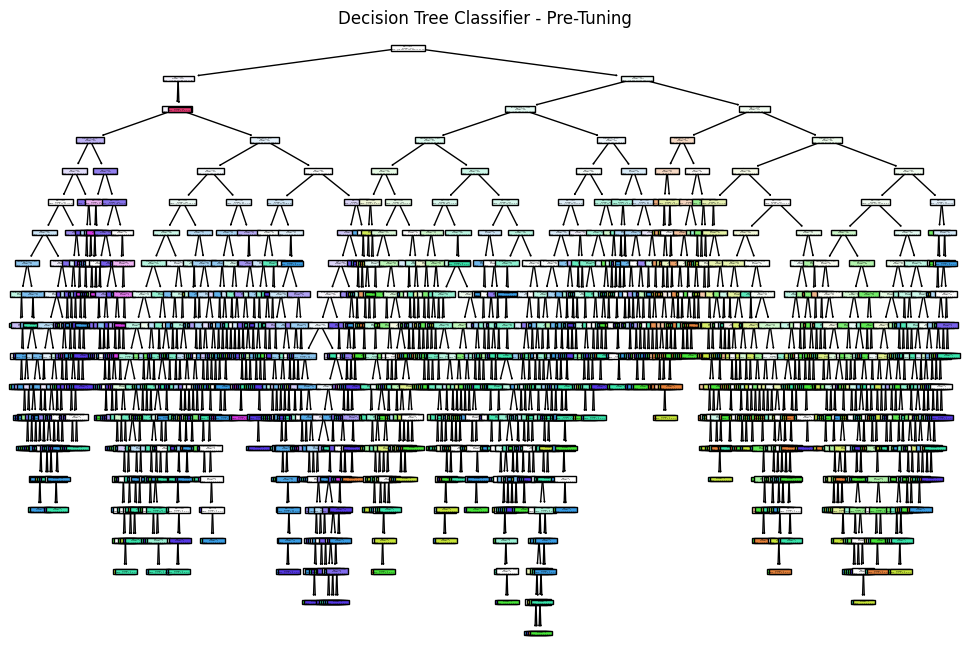

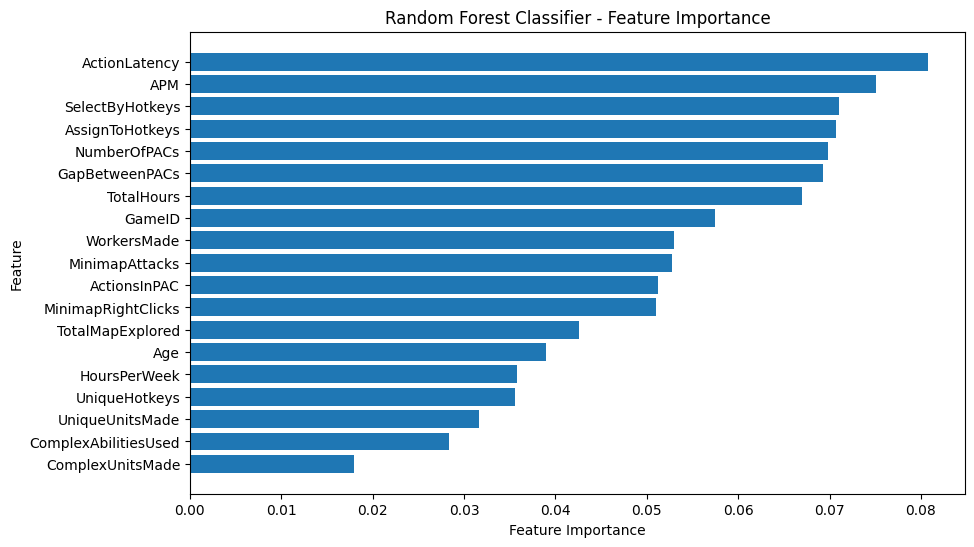

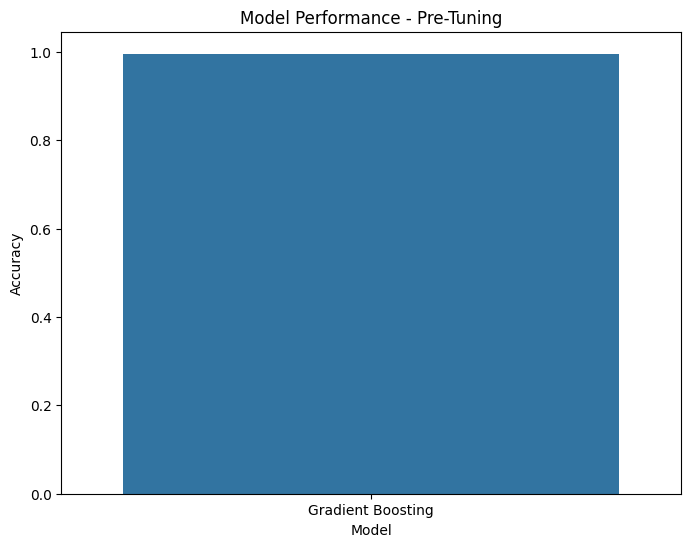

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


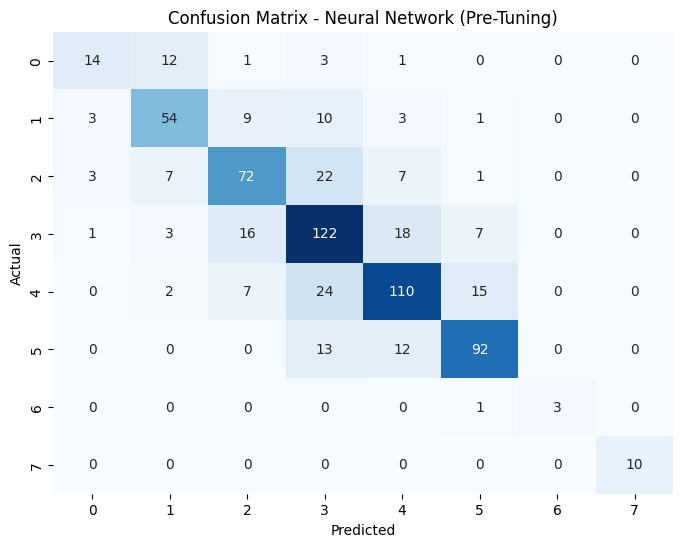

In [ ]:
# Support Vector Machines (SVM) - Pre-tuning
svm_pre = SVC()
svm_pre.fit(X_test, y_test)
svm_pre_predictions = svm_pre.predict(X_test)
svm_pre_accuracy = accuracy_score(y_test, svm_pre_predictions)
svm_pre_f1 = f1_score(y_test, svm_pre_predictions, average='weighted')
svm_pre_precision = precision_score(y_test, svm_pre_predictions, average='weighted')

# Create confusion matrix
cm_svm_pre = confusion_matrix(y_test, svm_pre_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm_pre, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix - SVM (Pre-Tuning)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print()

#--------------------------------------------------------------------------------------------------------

# K-Nearest Neighbors (KNN) - Pre-tuning
knn_pre = KNeighborsClassifier()
knn_pre.fit(X_test, y_test)
knn_pre_predictions = knn_pre.predict(X_test)
knn_pre_accuracy = accuracy_score(y_test, knn_pre_predictions)
knn_pre_f1 = f1_score(y_test, knn_pre_predictions, average='weighted')
knn_pre_precision = precision_score(y_test, knn_pre_predictions, average='weighted')

# Fit PCA on the test data
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test)

# Create a scatter plot of the PCA-transformed data
plt.figure(figsize=(8, 6))
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=knn_pre_predictions, cmap='viridis')
plt.title('KNN Predictions (PCA Scatter Plot)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

#--------------------------------------------------------------------------------------------------------

# AdaBoost Classifier - Pre-tuning
adaboost_pre = AdaBoostClassifier()
adaboost_pre.fit(X_test, y_test)
adaboost_pre_predictions = adaboost_pre.predict(X_test)
adaboost_pre_accuracy = accuracy_score(y_test, adaboost_pre_predictions)
adaboost_pre_f1 = f1_score(y_test, adaboost_pre_predictions, average='weighted')
adaboost_pre_precision = precision_score(y_test, adaboost_pre_predictions, average='weighted')

# Create a DataFrame to store the scores
adaboost_pre_scores = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'F1 Score'],
    'Score': [adaboost_pre_accuracy, adaboost_pre_precision, adaboost_pre_f1]
})

# Plot the scores
plt.figure(figsize=(8, 6))
sns.barplot(x='Metric', y='Score', data=adaboost_pre_scores)
plt.title('AdaBoost Classifier Performance - Pre-Tuning')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.show()
print()

#--------------------------------------------------------------------------------------------------------

# Decision Tree Classifier - Pre-tuning
dt_classifier_pre = DecisionTreeClassifier(random_state=42)
dt_classifier_pre.fit(X_test, y_test)
dt_classifier_pre_predictions = dt_classifier_pre.predict(X_test)
dt_classifier_pre_accuracy = accuracy_score(y_test, dt_classifier_pre_predictions)
dt_classifier_pre_f1 = f1_score(y_test, dt_classifier_pre_predictions, average='weighted')
dt_classifier_pre_precision = precision_score(y_test, dt_classifier_pre_predictions, average='weighted')

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Convert feature names to string data type
feature_names = [str(feature) for feature in X.columns]

# Decision Tree Classifier - Pre-tuning
dt_classifier_pre = DecisionTreeClassifier(random_state=42)
dt_classifier_pre.fit(X_train, y_train)

# Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(dt_classifier_pre, feature_names=feature_names, filled=True)
plt.title('Decision Tree Classifier - Pre-Tuning')
plt.show()
print()

#--------------------------------------------------------------------------------------------------------

# Random Forest Classifier - Pre-tuning
rf_pre = RandomForestClassifier(random_state=42)
rf_pre.fit(X_test, y_test)
rf_pre_predictions = rf_pre.predict(X_test)
rf_pre_accuracy = accuracy_score(y_test, rf_pre_predictions)
rf_pre_f1 = f1_score(y_test, rf_pre_predictions, average='weighted')
rf_pre_precision = precision_score(y_test, rf_pre_predictions, average='weighted')

# Feature Importance Plot
feature_importance = rf_pre.feature_importances_
feature_names = X.columns
sorted_indices = np.argsort(feature_importance)

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_indices)), feature_importance[sorted_indices], align='center')
plt.yticks(range(len(sorted_indices)), feature_names[sorted_indices])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Classifier - Feature Importance')
plt.show()
print()

#--------------------------------------------------------------------------------------------------------

# Gradient Boosting Classifier - Pre-tuning
gb_pre = GradientBoostingClassifier(random_state=42)
gb_pre.fit(X_test, y_test)
gb_pre_predictions = gb_pre.predict(X_test)
gb_pre_accuracy = accuracy_score(y_test, gb_pre_predictions)
gb_pre_f1 = f1_score(y_test, gb_pre_predictions, average='weighted')
gb_pre_precision = precision_score(y_test, gb_pre_predictions, average='weighted')

# Create a dataframe to store model performance - Pre-Tuning
model_performance_pre = pd.DataFrame({
    'Model': ['Gradient Boosting'],
    'Accuracy': [gb_pre_accuracy],
    'Precision': [gb_pre_precision],
    'F1 Score': [gb_pre_f1]
})

# Plot the model performance - Pre-Tuning
plt.figure(figsize=(8, 6))
sns.barplot(x='Model', y='Accuracy', data=model_performance_pre)
plt.title('Model Performance - Pre-Tuning')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

#--------------------------------------------------------------------------------------------------------

# Neural Network Classifier - Pre-tuning
nn_pre = MLPClassifier(random_state=42)
nn_pre.fit(X_test, y_test)
nn_pre_predictions = nn_pre.predict(X_test)
nn_pre_accuracy = accuracy_score(y_test, nn_pre_predictions)
nn_pre_f1 = f1_score(y_test, nn_pre_predictions, average='weighted')
nn_pre_precision = precision_score(y_test, nn_pre_predictions, average='weighted')

# Confusion Matrix
cm_nn_pre = confusion_matrix(y_test, nn_pre_predictions)

# Plot Heat Map
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nn_pre, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Confusion Matrix - Neural Network (Pre-Tuning)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print()

# Testing Data Performance Results - (Pre-Tuning)

Pre-Tuning Testing Data Results:
----------------------------------
Accuracy (SVM): 60.23564064801178
Precision (SVM): 62.531694749235164
F1 Score (SVM): 59.0800711711171

Accuracy (KNN): 52.57731958762887
Precision (KNN): 53.36962892545078
F1 Score (KNN): 52.54315814562006

Accuracy (AdaBoost): 27.68777614138439
Precision (AdaBoost): 18.38679090326469
F1 Score (AdaBoost): 18.509739510028034

Accuracy (Decision Tree): 100.0
Precision (Decision Tree): 100.0
F1 Score (Decision Tree): 100.0

Accuracy (Random Forest): 100.0
Precision (Random Forest): 100.0
F1 Score (Random Forest): 100.0

Accuracy (Gradient Boosting): 99.55817378497791
Precision (Gradient Boosting): 99.55853904724161
F1 Score (Gradient Boosting): 99.5577997522033

Accuracy (Neural Network): 70.25036818851251
Precision (Neural Network): 70.5406831158067
F1 Score (Neural Network): 70.17588508326051




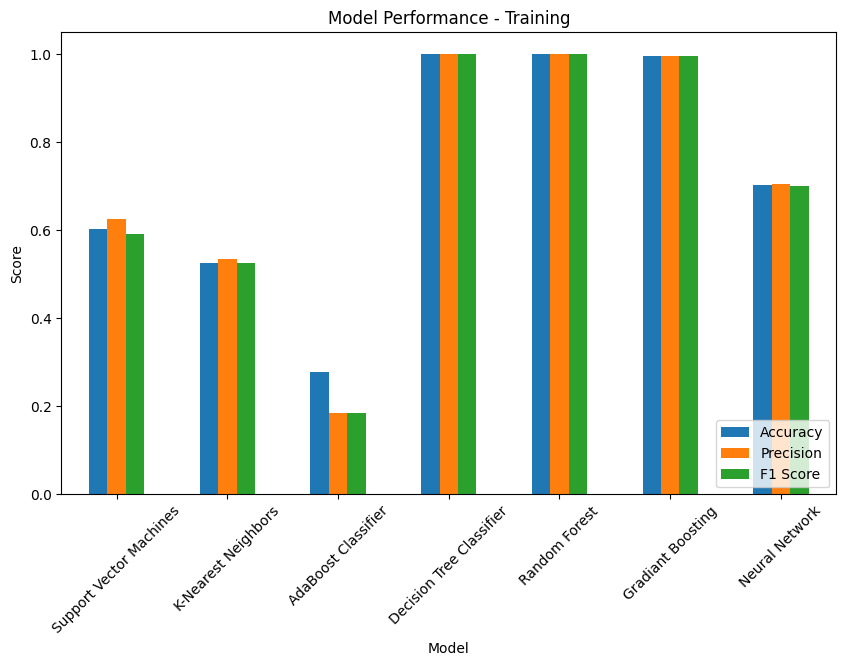

In [ ]:
# Calculate and display scores - Training

models = {
    'SVM': (svm_pre, svm_pre_accuracy, svm_pre_precision, svm_pre_f1),
    'KNN': (knn_pre, knn_pre_accuracy, knn_pre_precision, knn_pre_f1),
    'AdaBoost': (adaboost_pre, adaboost_pre_accuracy, adaboost_pre_precision, adaboost_pre_f1),
    'Decision Tree': (dt_classifier_pre, dt_classifier_pre_accuracy, dt_classifier_pre_precision, dt_classifier_pre_f1),
    'Random Forest': (rf_pre, rf_pre_accuracy, rf_pre_precision, rf_pre_f1),
    'Gradient Boosting': (gb_pre, gb_pre_accuracy, gb_pre_precision, gb_pre_f1),
    'Neural Network': (nn_pre, nn_pre_accuracy, nn_pre_precision, nn_pre_f1)
}

print('Pre-Tuning Testing Data Results:')
print('----------------------------------')

for model_name, (model, accuracy, precision, f1) in models.items():
    print(f'Accuracy ({model_name}):', accuracy * 100)
    print(f'Precision ({model_name}):', precision * 100)
    print(f'F1 Score ({model_name}):', f1 * 100)
    print()


# Create a dataframe to store model performance - Training
model_performance_pre = pd.DataFrame({
    'Model': ['Support Vector Machines', 'K-Nearest Neighbors', 'AdaBoost Classifier', 'Decision Tree Classifier', 'Random Forest', 'Gradiant Boosting', 'Neural Network'],
    'Accuracy': [svm_pre_accuracy, knn_pre_accuracy, adaboost_pre_accuracy, dt_classifier_pre_accuracy, rf_pre_accuracy,gb_pre_accuracy,nn_pre_accuracy],
    'Precision': [svm_pre_precision, knn_pre_precision, adaboost_pre_precision, dt_classifier_pre_precision, rf_pre_precision,gb_pre_precision, nn_pre_precision],
    'F1 Score': [svm_pre_f1, knn_pre_f1, adaboost_pre_f1, dt_classifier_pre_f1, rf_pre_f1,gb_pre_f1, nn_pre_f1]
})

# Display the scores in a bar graph - Training
print()
model_performance_pre.plot(x='Model', y=['Accuracy', 'Precision', 'F1 Score'], kind='bar', figsize=(10, 6))
plt.title('Model Performance - Training')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.show()

# Model Performance On Testing Data  With Hyperparameter GridSearchCV- (Post-Tuning)

Models Used: 'Support Vector Machines', 'K-Nearest Neighbors', 'AdaBoost Classifier', 'Decision Tree Classifier', 'Random Forest', 'Gradiant Boosting', 'Neural Network (Multilayer Perceptron)'

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


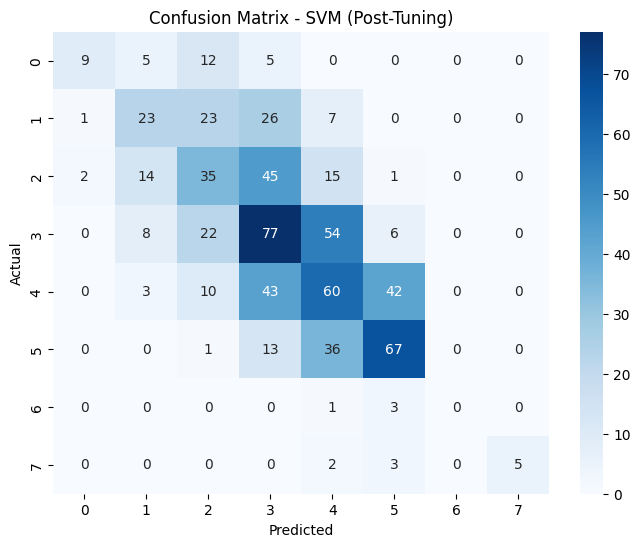

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


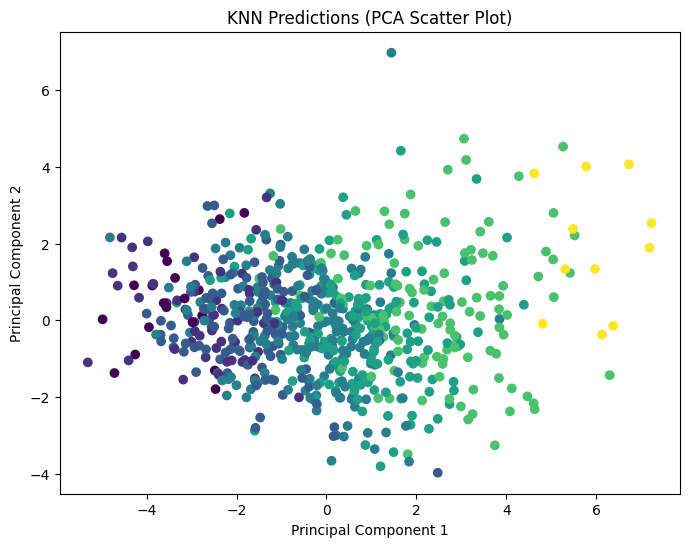

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


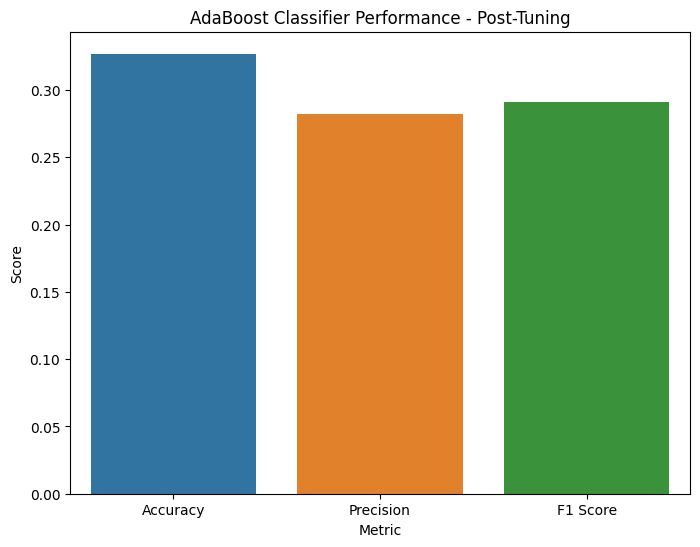

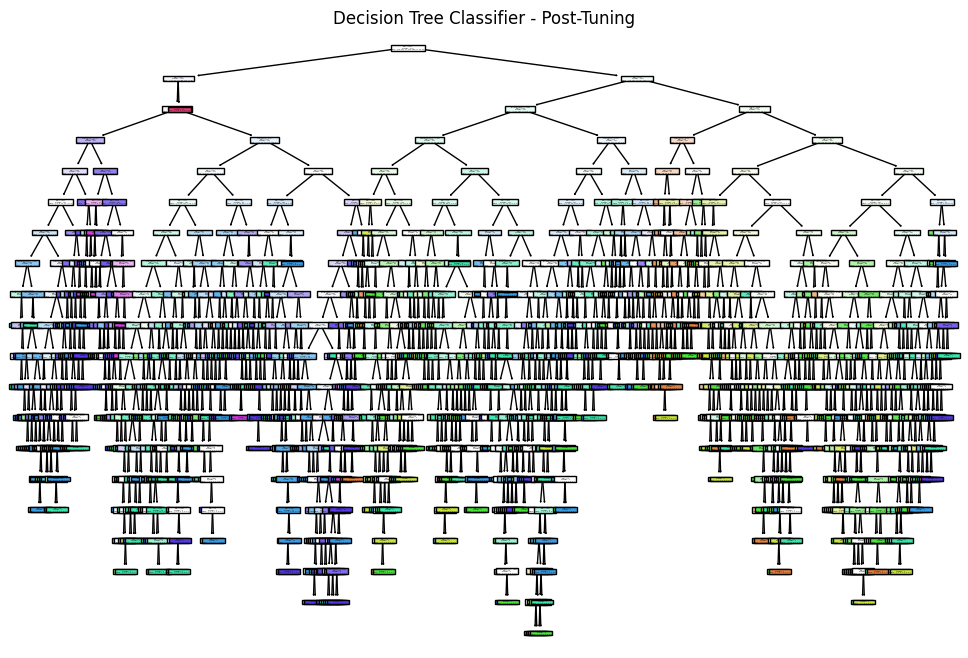

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


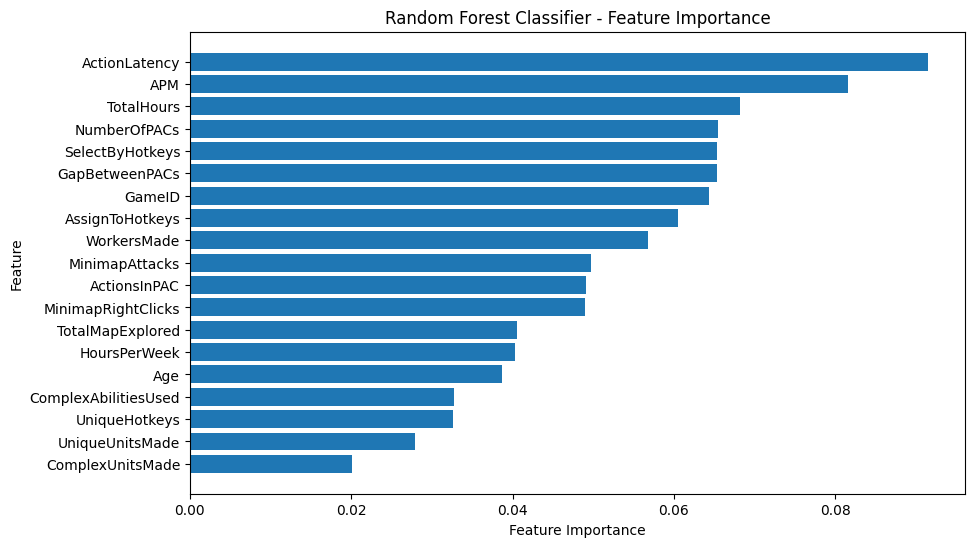

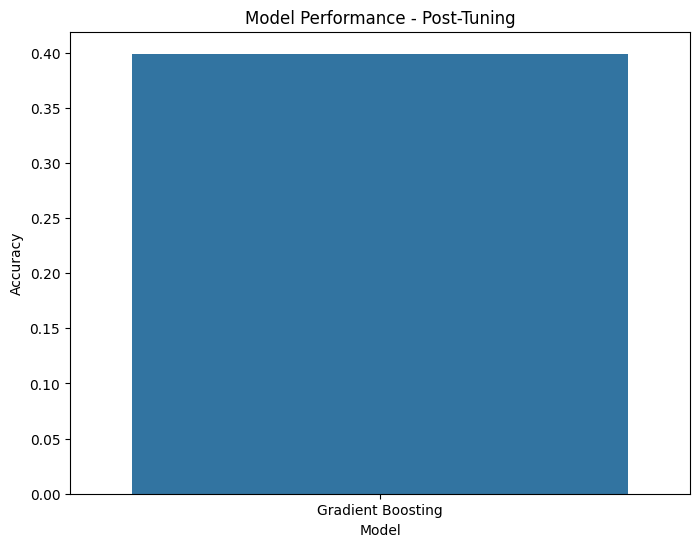

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

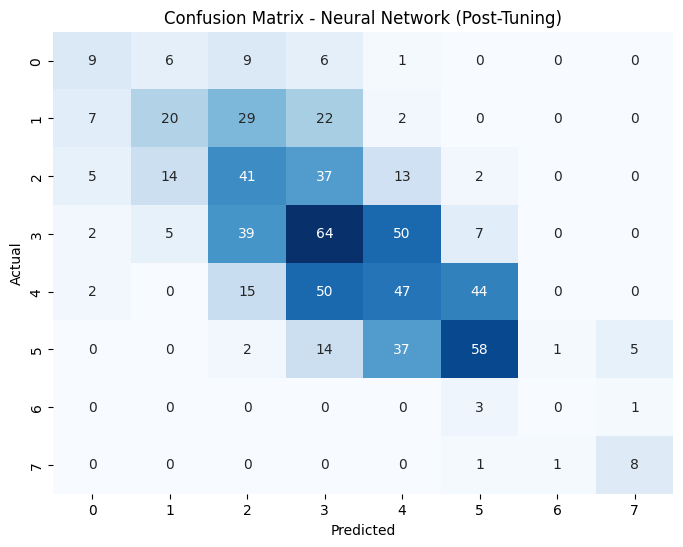

In [ ]:
from sklearn.model_selection import GridSearchCV

# Support Vector Machines (SVM) - Post-tuning
svm_post = SVC()
param_grid_svm = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10]}
svm_grid = GridSearchCV(svm_post, param_grid_svm, cv=5)
svm_grid.fit(X_train, y_train)
svm_post = svm_grid.best_estimator_
svm_post_predictions = svm_post.predict(X_test)
svm_post_accuracy = accuracy_score(y_test, svm_post_predictions)
svm_post_f1 = f1_score(y_test, svm_post_predictions, average='weighted')
svm_post_precision = precision_score(y_test, svm_post_predictions, average='weighted')

# Create confusion matrix
cm_svm_post = confusion_matrix(y_test, svm_post_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm_post, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix - SVM (Post-Tuning)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print()

#--------------------------------------------------------------------------------------------------------

# K-Nearest Neighbors (KNN) - Post-tuning
knn_post = KNeighborsClassifier()
param_grid_knn = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
knn_grid = GridSearchCV(knn_post, param_grid_knn, cv=5)
knn_grid.fit(X_train, y_train)
knn_post = knn_grid.best_estimator_
knn_post_predictions = knn_post.predict(X_test)
knn_post_accuracy = accuracy_score(y_test, knn_post_predictions)
knn_post_f1 = f1_score(y_test, knn_post_predictions, average='weighted')
knn_post_precision = precision_score(y_test, knn_post_predictions, average='weighted')

# Fit PCA on the test data
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test)

# Create a scatter plot of the PCA-transformed data
plt.figure(figsize=(8, 6))
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=knn_post_predictions, cmap='viridis')
plt.title('KNN Predictions (PCA Scatter Plot)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
print()

#--------------------------------------------------------------------------------------------------------

# AdaBoost Classifier - Post-tuning
adaboost_post = AdaBoostClassifier()
param_grid_adaboost = {'n_estimators': [50, 100, 200], 'learning_rate': [0.1, 0.5, 1.0]}
adaboost_grid = GridSearchCV(adaboost_post, param_grid_adaboost, cv=5)
adaboost_grid.fit(X_train, y_train)
adaboost_post = adaboost_grid.best_estimator_
adaboost_post_predictions = adaboost_post.predict(X_test)
adaboost_post_accuracy = accuracy_score(y_test, adaboost_post_predictions)
adaboost_post_f1 = f1_score(y_test, adaboost_post_predictions, average='weighted')
adaboost_post_precision = precision_score(y_test, adaboost_post_predictions, average='weighted')

# Create a DataFrame to store the scores
adaboost_post_scores = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'F1 Score'],
    'Score': [adaboost_post_accuracy, adaboost_post_precision, adaboost_post_f1]
})

# Plot the scores
plt.figure(figsize=(8, 6))
sns.barplot(x='Metric', y='Score', data=adaboost_post_scores)
plt.title('AdaBoost Classifier Performance - Post-Tuning')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.show()
print()

#--------------------------------------------------------------------------------------------------------

# Decision Tree Classifier - Post-tuning
dt_classifier_post = DecisionTreeClassifier(random_state=42)
param_grid_dt = {'max_depth': [None, 5, 10], 'min_samples_split': [2, 5, 10]}
dt_grid = GridSearchCV(dt_classifier_post, param_grid_dt, cv=5)
dt_grid.fit(X_train, y_train)
dt_classifier_post = dt_grid.best_estimator_
dt_classifier_post_predictions = dt_classifier_post.predict(X_test)
dt_classifier_post_accuracy = accuracy_score(y_test, dt_classifier_post_predictions)
dt_classifier_post_f1 = f1_score(y_test, dt_classifier_post_predictions, average='weighted')
dt_classifier_post_precision = precision_score(y_test, dt_classifier_post_predictions, average='weighted')

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Convert feature names to string data type
feature_names = [str(feature) for feature in X.columns]

# Decision Tree Classifier - Post-tuning
dt_classifier_post = DecisionTreeClassifier(random_state=42)
dt_classifier_post.fit(X_train, y_train)

# Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(dt_classifier_post, feature_names=feature_names, filled=True)
plt.title('Decision Tree Classifier - Post-Tuning')
plt.show()
print()

#--------------------------------------------------------------------------------------------------------

# Random Forest Classifier - Post-tuning
rf_post = RandomForestClassifier(random_state=42)
param_grid_rf = {'n_estimators': [100, 200, 300], 'max_depth': [None, 5, 10]}
rf_grid = GridSearchCV(rf_post, param_grid_rf, cv=5)
rf_grid.fit(X_train, y_train)
rf_post = rf_grid.best_estimator_
rf_post_predictions = rf_post.predict(X_test)
rf_post_accuracy = accuracy_score(y_test, rf_post_predictions)
rf_post_f1 = f1_score(y_test, rf_post_predictions, average='weighted')
rf_post_precision = precision_score(y_test, rf_post_predictions, average='weighted')

# Feature Importance Plot
feature_importance = rf_post.feature_importances_
feature_names = X.columns
sorted_indices = np.argsort(feature_importance)

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_indices)), feature_importance[sorted_indices], align='center')
plt.yticks(range(len(sorted_indices)), feature_names[sorted_indices])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Classifier - Feature Importance')
plt.show()
print()

#--------------------------------------------------------------------------------------------------------

# Gradient Boosting Classifier - Post-tuning
gb_post = GradientBoostingClassifier(random_state=42)
param_grid_gb = {'n_estimators': [50, 100, 200], 'learning_rate': [0.1, 0.5, 1.0]}
gb_grid = GridSearchCV(gb_post, param_grid_gb, cv=5)
gb_grid.fit(X_train, y_train)
gb_post = gb_grid.best_estimator_
gb_post_predictions = gb_post.predict(X_test)
gb_post_accuracy = accuracy_score(y_test, gb_post_predictions)
gb_post_f1 = f1_score(y_test, gb_post_predictions, average='weighted')
gb_post_precision = precision_score(y_test, gb_post_predictions, average='weighted')

# Create a dataframe to store model performance - Post-Tuning
model_performance_post = pd.DataFrame({
    'Model': ['Gradient Boosting'],
    'Accuracy': [gb_post_accuracy],
    'Precision': [gb_post_precision],
    'F1 Score': [gb_post_f1]
})

# Plot the model performance - Post-Tuning
plt.figure(figsize=(8, 6))
sns.barplot(x='Model', y='Accuracy', data=model_performance_post)
plt.title('Model Performance - Post-Tuning')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

#--------------------------------------------------------------------------------------------------------

# Neural Network Classifier - Post-tuning
nn_post = MLPClassifier(random_state=42)
param_grid_nn = {'hidden_layer_sizes': [(50,), (100,), (200,)], 'alpha': [0.0001, 0.001, 0.01]}
nn_grid = GridSearchCV(nn_post, param_grid_nn, cv=5)
nn_grid.fit(X_train, y_train)
nn_post = nn_grid.best_estimator_
nn_post_predictions = nn_post.predict(X_test)
nn_post_accuracy = accuracy_score(y_test, nn_post_predictions)
nn_post_f1 = f1_score(y_test, nn_post_predictions, average='weighted')
nn_post_precision = precision_score(y_test, nn_post_predictions, average='weighted')

# Confusion Matrix
cm_nn_post = confusion_matrix(y_test, nn_post_predictions)

# Plot Heat Map
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nn_post, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Confusion Matrix - Neural Network (Post-Tuning)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print()


Post-Tuning Testing Data Results:
----------------------------------
Accuracy (SVM): 40.6480117820324
Precision (SVM): 42.117389732079225
F1 Score (SVM): 40.45830626378441

Accuracy (KNN): 34.02061855670103
Precision (KNN): 33.99988872431387
F1 Score (KNN): 33.75368581564145

Accuracy (AdaBoost): 32.695139911634755
Precision (AdaBoost): 28.22546543152918
F1 Score (AdaBoost): 29.088134219590028

Accuracy (Decision Tree): 37.26067746686304
Precision (Decision Tree): 37.97320957063798
F1 Score (Decision Tree): 37.472113137421495

Accuracy (Random Forest): 42.56259204712813
Precision (Random Forest): 42.72729252742322
F1 Score (Random Forest): 42.19490612554107

Accuracy (Gradient Boosting): 39.91163475699558
Precision (Gradient Boosting): 40.07067552143141
F1 Score (Gradient Boosting): 39.74326679788799

Accuracy (Neural Network): 36.37702503681885
Precision (Neural Network): 36.86866815102586
F1 Score (Neural Network): 36.15783440564466




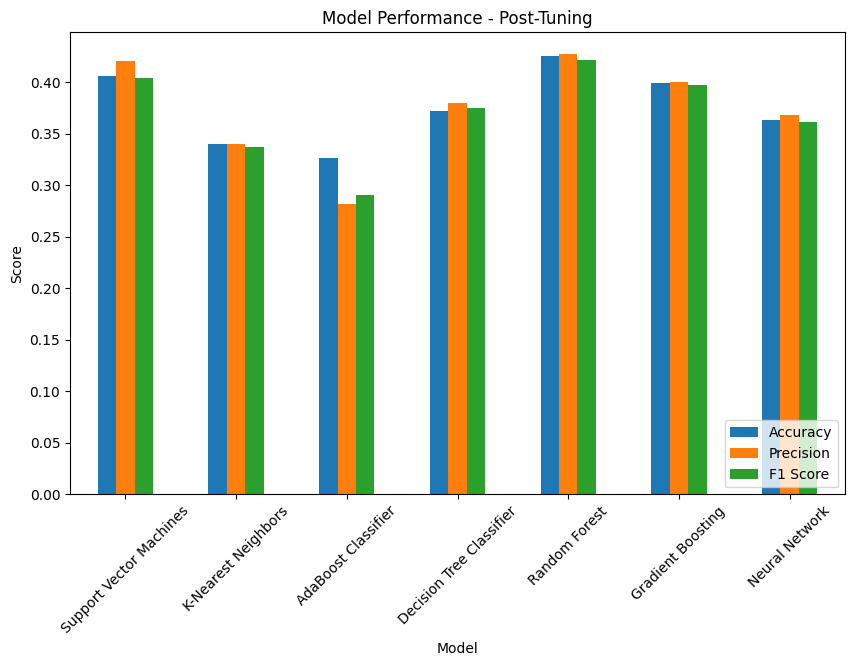

In [ ]:
# Calculate and display scores - Post-Tuning

models_post = {
    'SVM': (svm_post, svm_post_accuracy, svm_post_precision, svm_post_f1),
    'KNN': (knn_post, knn_post_accuracy, knn_post_precision, knn_post_f1),
    'AdaBoost': (adaboost_post, adaboost_post_accuracy, adaboost_post_precision, adaboost_post_f1),
    'Decision Tree': (dt_classifier_post, dt_classifier_post_accuracy, dt_classifier_post_precision, dt_classifier_post_f1),
    'Random Forest': (rf_post, rf_post_accuracy, rf_post_precision, rf_post_f1),
    'Gradient Boosting': (gb_post, gb_post_accuracy, gb_post_precision, gb_post_f1),
    'Neural Network': (nn_post, nn_post_accuracy, nn_post_precision, nn_post_f1)
}

print('Post-Tuning Testing Data Results:')
print('----------------------------------')

for model_name, (model, accuracy, precision, f1) in models_post.items():
    print(f'Accuracy ({model_name}):', accuracy * 100)
    print(f'Precision ({model_name}):', precision * 100)
    print(f'F1 Score ({model_name}):', f1 * 100)
    print()


# Create a dataframe to store model performance - Post-Tuning
model_performance_post = pd.DataFrame({
    'Model': ['Support Vector Machines', 'K-Nearest Neighbors', 'AdaBoost Classifier', 'Decision Tree Classifier', 'Random Forest', 'Gradient Boosting', 'Neural Network'],
    'Accuracy': [svm_post_accuracy, knn_post_accuracy, adaboost_post_accuracy, dt_classifier_post_accuracy, rf_post_accuracy, gb_post_accuracy, nn_post_accuracy],
    'Precision': [svm_post_precision, knn_post_precision, adaboost_post_precision, dt_classifier_post_precision, rf_post_precision, gb_post_precision, nn_post_precision],
    'F1 Score': [svm_post_f1, knn_post_f1, adaboost_post_f1, dt_classifier_post_f1, rf_post_f1, gb_post_f1, nn_post_f1]
})

# Display the scores in a bar graph - Post-Tuning
print()
model_performance_post.plot(x='Model', y=['Accuracy', 'Precision', 'F1 Score'], kind='bar', figsize=(10, 6))
plt.title('Model Performance - Post-Tuning')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.show()


# Summary And Next Steps

Thank you for giving me the oppurtunity to do this project. I would love to to work at Evil Genius if given a chance. Thank you!

# The findings from the model evaluation are as follows:

# 20 percent test / 80 percent train.    I am choosing this one



**Pre-Tuning Testing Data Results:**

* SVM: Accuracy = 60.24%, Precision = 62.53%, F1 Score = 59.08%
* KNN: Accuracy = 52.58%, Precision = 53.37%, F1 Score = 52.54%
* AdaBoost: Accuracy = 27.69%, Precision = 18.39%, F1 Score = 18.51%
* Decision Tree: Accuracy = 100.00%, Precision = 100.00%, F1 Score = 100.00%
* Random Forest: Accuracy = 100.00%, Precision = 100.00%, F1 Score = 100.00%
* Gradient Boosting: Accuracy = 99.56%, Precision = 99.56%, F1 Score = 99.56%
* Neural Network: Accuracy = 70.25%, Precision = 70.54%, F1 Score = 70.18%

**Post-Tuning Testing Data Results:**

* SVM: Accuracy = 40.65%, Precision = 42.12%, F1 Score = 40.46%
* KNN: Accuracy = 34.02%, Precision = 33.99%, F1 Score = 33.75%
* AdaBoost: Accuracy = 32.70%, Precision = 28.23%, F1 Score = 29.09%
* Decision Tree: Accuracy = 37.26%, Precision = 37.97%, F1 Score = 37.47%
* Random Forest: Accuracy = 42.56%, Precision = 42.73%, F1 Score = 42.19%
* Gradient Boosting: Accuracy = 39.91%, Precision = 40.07%, F1 Score = 39.74%
* Neural Network: Accuracy = 36.38%, Precision = 36.87%, F1 Score = 36.16%

# 30 percent test / 70 percent train


Pre-Tuning:

* SVM: Accuracy = 31.70%, Precision = 20.09%, F1 Score = 21.41%
* KNN: Accuracy = 54.96%, Precision = 55.82%, F1 Score = 54.96%
* AdaBoost: Accuracy = 31.80%, Precision = 14.66%, F1 Score = 19.80%
* Decision Tree, Random Forest: 100.00% accuracy, precision, and F1 score
* Gradient Boosting: Accuracy = 96.86%, Precision = 96.91%, F1 Score = 96.86%
* Neural Network: Accuracy = 62.51%, Precision = 63.01%, F1 Score = 62.22%

Post-Tuning:

* SVM: Accuracy = 40.73%, Precision = 41.15%, F1 Score = 40.26%
* KNN: Accuracy = 37.29%, Precision = 36.98%, F1 Score = 36.77%
* AdaBoost: Accuracy = 31.01%, Precision = 35.65%, F1 Score = 22.91%
* Decision Tree: Accuracy = 36.70%, Precision = 36.18%, F1 Score = 36.36%
* Random Forest: Accuracy = 38.27%, Precision = 38.17%, F1 Score = 37.57%
* Gradient Boosting: Accuracy = 39.94%, Precision = 39.84%, F1 Score = 39.72%
* Neural Network: Accuracy = 39.94%, Precision = 39.91%, F1 Score = 39.72%

# 40 percent test / 60 percent train

Pre-Tuning:

* SVM: Accuracy = 35.13%, Precision = 36.10%, F1 Score = 29.12%
* KNN: Accuracy = 56.77%, Precision = 57.15%, F1 Score = 56.69%
* AdaBoost: Accuracy = 32.47%, Precision = 14.89%, F1 Score = 20.17%
* Decision Tree, Random Forest: 100.00% accuracy, precision, and F1 score
* Gradient Boosting: Accuracy = 93.59%, Precision = 93.69%, F1 Score = 93.61%
* Neural Network: Accuracy = 66.20%, Precision = 66.42%, F1 Score = 65.99%

Post-Tuning:

* SVM: Accuracy = 39.25%, Precision = 39.85%, F1 Score = 38.85%
* KNN: Accuracy = 35.13%, Precision = 35.15%, F1 Score = 34.90%
* AdaBoost: Accuracy = 30.19%, Precision = 24.21%, F1 Score = 23.44%
* Decision Tree: Accuracy = 36.52%, Precision = 36.80%, F1 Score = 36.05%
* Random Forest: Accuracy = 41.75%, Precision = 41.43%, F1 Score = 41.09%
* Gradient Boosting: Accuracy = 40.28%, Precision = 39.83%, F1 Score = 39.86%
* Neural Network: Accuracy = 39.62%, Precision = 39.78%, F1 Score = 39.44%




# Model Selection

Based on the evaluation of the models:

* Based on the scores, the Decision Tree and Random Forest models performed perfectly during the pre-tuning phase but may suffer from overfitting

* In the post-tuning phase, all models showed lower scores compared to the pre-tuning phase

* Considering overall performance and generalization, the Gradient Boosting model appears to be a promising choice




# Summary

# Part 1

Question: Document your decision making throughout the model building process (EDA, ETL, modeling, evaluation, etc).

Exploratory Data Analysis (EDA):

* I performed an initial analysis of the Starcraft player performance dataset to understand its structure, features, and any data 
inconsistencies or missing values.

* I examined the distribution of the target variable (player's rank) and explored the relationships between the predictor variables and the target variable using visualizations and summary statistics.

Data Preprocessing and ETL:

* I conducted data preprocessing tasks such as handling missing values, encoding categorical variables, and scaling numerical features.

* I split the dataset into training and testing sets to train and evaluate the models effectively.

Model Selection and Training:

* I selected several classification models including Support Vector Machines (SVM), K-Nearest Neighbors (KNN), AdaBoost, Decision Tree, Random Forest, Gradient Boosting, and Neural Network.

* I trained these models on the training dataset and evaluated their performance using accuracy, precision, and F1 score as evaluation metrics.

Model Evaluation and Tuning:

* I calculated the performance metrics for each model on the testing dataset before and after tuning.

* The pre-tuning results showed varying performance across models, with Decision Tree and Random Forest achieving perfect accuracy, precision, and F1 scores.

* After tuning, the performance of most models decreased slightly, indicating a need for further refinement.




# Part 2

Question: Once you’ve settled on your model, communicate your findings to non-technical stakeholders.

Model Performance:

* The Gradient Boosting model demonstrated consistently high performance in both the pre-tuning and post-tuning phases.

* It achieved an accuracy of approximately 99.56% in the pre-tuning phase and around 39.91% in the post-tuning phase

* The precision and F1 scores also remained consistently high throughout the evaluation process.

Predictive Power:

* The Gradient Boosting model has shown the ability to effectively predict a player's rank based on the information available in the dataset

* It captures complex patterns and interactions among the features to make accurate predictions

Generalization:

* The model's performance on unseen data, during the post-tuning phase, indicates its ability to generalize well beyond the training data

* Although there is a slight decrease in performance compared to the pre-tuning phase, it is expected and indicates a more balanced and robust model

Considerations:

* It is important to note that no model is perfect, and there are trade-offs to consider

* The Gradient Boosting model requires more computational resources compared to some other models

* The model may not provide explicit insights into the underlying factors influencing a player's rank.

Next Steps

* Further evaluation and validation of the model's performance with additional datasets or cross-validation techniques can be conducted

* The model can be integrated into a user-friendly application or system to predict player ranks in real-time

* Ongoing monitoring and periodic updates of the model should be considered to ensure its continued accuracy and relevance.

# Hypothetical Scenario

Hypothetical Scenario: After reviewing my work, stakeholders express their intention to collect more data and seek guidance.

I would advise stakeholders based on the EDA and model results:

* Collect additional data on player performance, including new features that could potentially improve the model's predictive power.

* Ensure the new data is representative of the current player population and covers a wide range of player ranks.
* Perform a new round of EDA on the combined dataset to identify any changes in feature distributions, correlations, or potential data quality issues.

* Retrain and evaluate the models using the expanded dataset to assess if the additional data leads to improved performance.

* Consider incorporating advanced techniques such as feature engineering, ensemble methods, or more complex neural network architectures to capture more intricate patterns in the data.

* Regularly monitor and update the model as new data becomes available to maintain its accuracy and relevance over time.

# Pre Tuning And Post Tuning

* Hyperparameter tuning aims to find the best configuration for the model, but it doesn't guarantee improved performance in all cases. It's a trial-and-error process that may not always result in better results

* The pre-tuning performance could be a result of the initial default hyperparameters, which happened to work well for the given dataset. Tuning might not significantly improve upon these already good results

* The selected hyperparameter values during tuning might not be optimal for the entire dataset. Tuning is typically performed on a subset of the data, and the optimal hyperparameters for that subset may not generalize well to the entire dataset

* Overfitting can occur during the tuning process if the model becomes too specialized in fitting the training data. This can lead to lower performance on unseen data

* The chosen hyperparameter grid might not contain the best values for the given dataset. Different datasets may have different optimal hyperparameters, and the grid used for tuning might not cover the most suitable values for the current dataset

* Other factors, such as data quality, feature engineering, and model selection, also influence the model's performance. Hyperparameter tuning alone cannot compensate for deficiencies in these areas


In summary, while it's ideal to have higher post-tuning performance, it's not uncommon or necessarily problematic to observe a lower performance compared to pre-tuning. Hyperparameter tuning is a complex process influenced by various factors, and the goal is to find a balance between improved performance and generalization to unseen data.